In [82]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline
from google.colab import files
import io
import seaborn as sns

# Gathering Data

In [83]:
uploaded = files.upload()
df_18 = pd.read_csv(io.BytesIO(uploaded['all_alpha_18.csv']))
df_08 = pd.read_csv(io.BytesIO(uploaded['all_alpha_08.csv']))

Saving all_alpha_08.csv to all_alpha_08 (1).csv
Saving all_alpha_18.csv to all_alpha_18 (1).csv


# Data Assessment

## 2008 Data

In [84]:
df_08.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Sales Area,Stnd,Underhood ID,Veh Class,Air Pollution Score,FE Calc Appr,City MPG,Hwy MPG,Cmb MPG,Unadj Cmb MPG,Greenhouse Gas Score,SmartWay
0,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT03.7PKR,SUV,7,Drv,15,20,17,22.0527,4,no
1,ACURA MDX,3.7,(6 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT03.7PKR,SUV,6,Drv,15,20,17,22.0527,4,no
2,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXT02.3DKR,SUV,7,Drv,17,22,19,24.1745,5,no
3,ACURA RDX,2.3,(4 cyl),Auto-S5,4WD,Gasoline,FA,B5,8HNXT02.3DKR,SUV,6,Drv,17,22,19,24.1745,5,no
4,ACURA RL,3.5,(6 cyl),Auto-S5,4WD,Gasoline,CA,U2,8HNXV03.5HKR,midsize car,7,Drv,16,24,19,24.5629,5,no


In [85]:
df_08.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2404 entries, 0 to 2403
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 2404 non-null   object 
 1   Displ                 2404 non-null   float64
 2   Cyl                   2205 non-null   object 
 3   Trans                 2205 non-null   object 
 4   Drive                 2311 non-null   object 
 5   Fuel                  2404 non-null   object 
 6   Sales Area            2404 non-null   object 
 7   Stnd                  2404 non-null   object 
 8   Underhood ID          2404 non-null   object 
 9   Veh Class             2404 non-null   object 
 10  Air Pollution Score   2404 non-null   object 
 11  FE Calc Appr          2205 non-null   object 
 12  City MPG              2205 non-null   object 
 13  Hwy MPG               2205 non-null   object 
 14  Cmb MPG               2205 non-null   object 
 15  Unadj Cmb MPG        

In [86]:
df_08.duplicated().sum()

25

In [87]:
df_08.isnull().sum()

Model                     0
Displ                     0
Cyl                     199
Trans                   199
Drive                    93
Fuel                      0
Sales Area                0
Stnd                      0
Underhood ID              0
Veh Class                 0
Air Pollution Score       0
FE Calc Appr            199
City MPG                199
Hwy MPG                 199
Cmb MPG                 199
Unadj Cmb MPG           199
Greenhouse Gas Score    199
SmartWay                  0
dtype: int64

In [88]:
df_08.nunique()

Model                   436
Displ                    47
Cyl                       8
Trans                    14
Drive                     2
Fuel                      5
Sales Area                3
Stnd                     12
Underhood ID            343
Veh Class                 9
Air Pollution Score      13
FE Calc Appr              2
City MPG                 39
Hwy MPG                  43
Cmb MPG                  38
Unadj Cmb MPG           721
Greenhouse Gas Score     20
SmartWay                  2
dtype: int64

In [89]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area', 'Stnd',
       'Underhood ID', 'Veh Class', 'Air Pollution Score', 'FE Calc Appr',
       'City MPG', 'Hwy MPG', 'Cmb MPG', 'Unadj Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

### Summary:
- data type: [Air Pollution Score, City MPG	,Hwy MPG,	Cmb MPG,Greenhouse Gas Score] columns need to be integers rather than objects
- duplicated rows
- missing values: [Cyl , Trans , Drive , FE Calc Appr , City MPG , Hwy MPG,	Cmb MPG ,	Unadj Cmb MPG	, Greenhouse Gas Score]
- rename columns
- remove unuseful columns

## 2018 Data

In [90]:
df_18.head()

,Model,Displ,Cyl,Trans,Drive,Fuel,Cert Region,Stnd,Stnd Description,Underhood ID,Veh Class,Air Pollution Score,City MPG,Hwy MPG,Cmb MPG,Greenhouse Gas Score,SmartWay,Comb CO2
0,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
1,ACURA RDX,3.5,6.0,SemiAuto-6,2WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,20,28,23,5,No,386
2,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,FA,T3B125,Federal Tier 3 Bin 125,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
3,ACURA RDX,3.5,6.0,SemiAuto-6,4WD,Gasoline,CA,U2,California LEV-II ULEV,JHNXT03.5GV3,small SUV,3,19,27,22,4,No,402
4,ACURA TLX,2.4,4.0,AMS-8,2WD,Gasoline,CA,L3ULEV125,California LEV-III ULEV125,JHNXV02.4WH3,small car,3,23,33,27,6,No,330


In [91]:
df_18.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 1611 non-null   object 
 1   Displ                 1609 non-null   float64
 2   Cyl                   1609 non-null   float64
 3   Trans                 1611 non-null   object 
 4   Drive                 1611 non-null   object 
 5   Fuel                  1611 non-null   object 
 6   Cert Region           1611 non-null   object 
 7   Stnd                  1611 non-null   object 
 8   Stnd Description      1611 non-null   object 
 9   Underhood ID          1611 non-null   object 
 10  Veh Class             1611 non-null   object 
 11  Air Pollution Score   1611 non-null   int64  
 12  City MPG              1611 non-null   object 
 13  Hwy MPG               1611 non-null   object 
 14  Cmb MPG               1611 non-null   object 
 15  Greenhouse Gas Score 

In [92]:
df_18.duplicated().sum()

0

In [93]:
df_18.isnull().sum()

Model                   0
Displ                   2
Cyl                     2
Trans                   0
Drive                   0
Fuel                    0
Cert Region             0
Stnd                    0
Stnd Description        0
Underhood ID            0
Veh Class               0
Air Pollution Score     0
City MPG                0
Hwy MPG                 0
Cmb MPG                 0
Greenhouse Gas Score    0
SmartWay                0
Comb CO2                0
dtype: int64

### Summary:
- data type: [City MPG , Hwy MPG , Cmb MPG , Comb CO2] need to be an integers rathar than objects
- missing values : Displ , cyl columns
- renaming columns
- remove unuseful columns

# Data Cleaning

## 2008 Data

### 1- Issue: removeing unuseful columns

### Code

In [94]:
df_08.drop(['Stnd', 'Underhood ID', 'FE Calc Appr', 'Unadj Cmb MPG'],axis=1 , inplace=True)

### Test

In [95]:
df_08.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Sales Area',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

### 2- Issue: rename columns

### Code

In [96]:
df_08.rename(columns= {'Sales Area':'Cert Region'},inplace=True)
df_08.rename(columns= lambda x : x.strip().lower().replace(' ','_'),inplace =True)

### Test

In [97]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

### 3-Issue: Drop Duplicates

### Code

In [98]:
df_08.drop_duplicates(inplace=True)

### Test

In [99]:
df_08.duplicated().sum()

0

### 4- Issue: Missing Values

### Code

In [100]:
df_08.dropna(inplace=True)

### Test

In [101]:
df_08.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### 5- Issue: Data Type

- cyl column: convert into int

In [102]:
df_08.cyl.value_counts()

(6 cyl)     836
(4 cyl)     582
(8 cyl)     516
(5 cyl)     113
(12 cyl)     60
(10 cyl)     29
(2 cyl)       4
(16 cyl)      2
Name: cyl, dtype: int64

In [103]:
df_08.cyl = df_08.cyl.str.extract('(\d+)').astype('int')

In [104]:
df_08.cyl.value_counts()

6     836
4     582
8     516
5     113
12     60
10     29
2       4
16      2
Name: cyl, dtype: int64

- air_pollution_score column: convert into float

In [105]:
df_08.air_pollution_score.value_counts()

6      1418
7       504
9.5      80
6/6      32
3        31
9        23
3/3      20
8        15
7/7      12
1         6
6/4       1
Name: air_pollution_score, dtype: int64

In [106]:
test_08= df_08[df_08.air_pollution_score.str.contains('/')].copy()
test_08.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,7/7,11/14,15/20,12/16,6/4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,7/7,11/14,14/19,12/16,6/4,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol/gas,FC,SUV,6/6,11/14,15/20,12/16,6/4,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,SUV,6/6,11/14,14/19,12/16,6/4,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol/gas,FC,van,6/6,9/12,12/16,10/14,4/2,no


- notice there are columns also have two values such as [city_mpg,	hwy_mpg,	cmb_mpg	,fuel, greenhouse_gas_score,air_pollution_score] splited by '/' and found that these vehicles that have two values use two types of the fuel. so, we will need to split them into individual rows

In [107]:
t1 = test_08.copy()
t2 = test_08.copy()

In [108]:
split_columns = ['city_mpg', 'hwy_mpg', 'cmb_mpg' ,'fuel', 'greenhouse_gas_score','air_pollution_score']
for c in split_columns:
  t1[c] = t1[c].apply(lambda x : x.split('/')[0])
  t2[c] = t2[c].apply(lambda x : x.split('/')[1])

In [109]:
t1.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no


In [110]:
t2.head(2)

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,gas,FC,SUV,7,14,20,16,4,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,gas,FC,SUV,7,14,19,16,4,no


In [111]:
new_test = t1.append(t2)
new_test

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
316,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,7,11,15,12,6,no
317,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,7,11,14,12,6,no
321,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,2WD,ethanol,FC,SUV,6,11,15,12,6,no
322,CHEVROLET Avalanche 1500,5.3,8,Auto-L4,4WD,ethanol,FC,SUV,6,11,14,12,6,no
380,CHEVROLET Express 1500,5.3,8,Auto-L4,4WD,ethanol,FC,van,6,9,12,10,4,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734,MITSUBISHI Raider,4.7,8,Auto-L5,4WD,gas,FA,pickup,3,14,19,15,3,no
1764,NISSAN Armada,5.6,8,Auto-L5,2WD,gas,FA,SUV,6,12,18,14,2,no
1765,NISSAN Armada,5.6,8,Auto-L5,4WD,gas,FA,SUV,6,12,17,14,2,no
1808,NISSAN Titan,5.6,8,Auto-L5,2WD,gas,FA,pickup,6,12,17,14,2,no


In [112]:
df_08.drop(test_08.index,inplace=True)

In [113]:
df_08 = df_08.append(new_test)

In [114]:
df_08[df_08.fuel.str.contains('/')]

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway


In [115]:
df_08.shape

(2207, 14)

In [116]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score      object
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score     object
smartway                 object
dtype: object

- change the columns [air_pollution_score	, city_mpg , hwy_mpg	cmb_mpg ,	greenhouse_gas_score] datatype from object into int

In [117]:
cols = ['air_pollution_score' , 'city_mpg' , 'hwy_mpg','cmb_mpg'] 
for c in cols:
  df_08[c] = df_08[c].astype('float')
df_08['greenhouse_gas_score'] = df_08['greenhouse_gas_score'].astype('int')

In [118]:
df_08.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

## 2018 Data

### 1- Issue: unuseful columns

### Code

In [119]:
df_18.drop(['Stnd', 'Stnd Description', 'Underhood ID', 'Comb CO2'],axis=1,inplace=True)

### Test

In [120]:
df_18.columns

Index(['Model', 'Displ', 'Cyl', 'Trans', 'Drive', 'Fuel', 'Cert Region',
       'Veh Class', 'Air Pollution Score', 'City MPG', 'Hwy MPG', 'Cmb MPG',
       'Greenhouse Gas Score', 'SmartWay'],
      dtype='object')

### 2- Issue: Rename Columns

### Code

In [121]:
df_18.rename(columns = lambda x : x.strip().lower().replace(' ','_'),inplace=True)

### Test

In [122]:
df_18.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

### 3- Issue: missing values

### Code

In [123]:
df_18.dropna(inplace=True)

### Test

In [124]:
df_18.isnull().sum()

model                   0
displ                   0
cyl                     0
trans                   0
drive                   0
fuel                    0
cert_region             0
veh_class               0
air_pollution_score     0
city_mpg                0
hwy_mpg                 0
cmb_mpg                 0
greenhouse_gas_score    0
smartway                0
dtype: int64

### 4- Issue: Data Types

- cyl column : convert into int

In [125]:
df_18.cyl.value_counts()

4.0     736
6.0     504
8.0     309
3.0      36
12.0     18
5.0       4
16.0      2
Name: cyl, dtype: int64

In [126]:
df_18.cyl = df_18.cyl.astype('int')

In [127]:
df_18.cyl.value_counts()

4     736
6     504
8     309
3      36
12     18
5       4
16      2
Name: cyl, dtype: int64

In [128]:
df_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,FA,small SUV,3,20,28,23,5,No
1,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,CA,small SUV,3,20,28,23,5,No
2,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,FA,small SUV,3,19,27,22,4,No
3,ACURA RDX,3.5,6,SemiAuto-6,4WD,Gasoline,CA,small SUV,3,19,27,22,4,No
4,ACURA TLX,2.4,4,AMS-8,2WD,Gasoline,CA,small car,3,23,33,27,6,No


In [129]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score       int64
city_mpg                 object
hwy_mpg                  object
cmb_mpg                  object
greenhouse_gas_score      int64
smartway                 object
dtype: object

- the same '/' problem in the 2008 dataset but in [fuel , city_mpg,	hwy_mpg,	cmb_mpg] columns only

In [130]:
test_18 = df_18[df_18.fuel.str.contains('/')]
test_18.head()

,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
108,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,3,28/66,34/78,30/71,10,Yes
109,BMW 330e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,3,28/66,34/78,30/71,10,Yes
160,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,CA,small car,7,27/70,31/75,29/72,10,Elite
161,BMW 530e,2.0,4,SemiAuto-8,2WD,Gasoline/Electricity,FA,small car,7,27/70,31/75,29/72,10,Elite
162,BMW 530e,2.0,4,SemiAuto-8,4WD,Gasoline/Electricity,CA,small car,7,27/66,31/68,28/67,10,Elite


In [131]:
t1_18 = test_18.copy()
t2_18 = test_18.copy()

In [132]:
split_columns_18 = ['fuel' , 'city_mpg', 'hwy_mpg', 'cmb_mpg']
for c in split_columns_18:
  t1_18[c] =  t1_18[c].apply(lambda x : x.split('/')[0])
  t2_18[c] =  t2_18[c].apply(lambda x : x.split('/')[1])

In [133]:
new_test_18 = t1_18.append(t2_18)

In [134]:
df_18.drop(new_test_18.index,inplace = True)

In [135]:
df_18 = df_18.append(new_test_18)

In [136]:
df_18.shape

(1688, 14)

In [137]:
cols =  ['air_pollution_score','city_mpg', 'hwy_mpg', 'cmb_mpg']
for col in cols : 
  df_18[col] = df_18[col].astype('float')

In [138]:
df_18.dtypes

model                    object
displ                   float64
cyl                       int64
trans                    object
drive                    object
fuel                     object
cert_region              object
veh_class                object
air_pollution_score     float64
city_mpg                float64
hwy_mpg                 float64
cmb_mpg                 float64
greenhouse_gas_score      int64
smartway                 object
dtype: object

In [139]:
df_08.dtypes == df_18.dtypes

model                   True
displ                   True
cyl                     True
trans                   True
drive                   True
fuel                    True
cert_region             True
veh_class               True
air_pollution_score     True
city_mpg                True
hwy_mpg                 True
cmb_mpg                 True
greenhouse_gas_score    True
smartway                True
dtype: bool

# Exploration

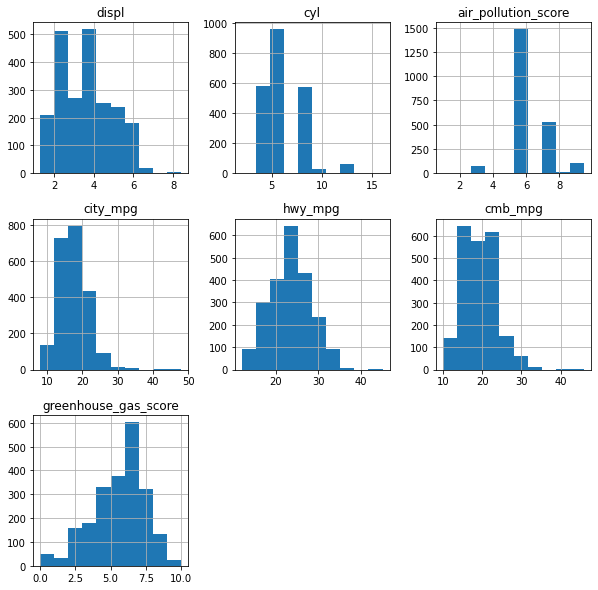

In [140]:
df_08.hist(figsize=(10,10));

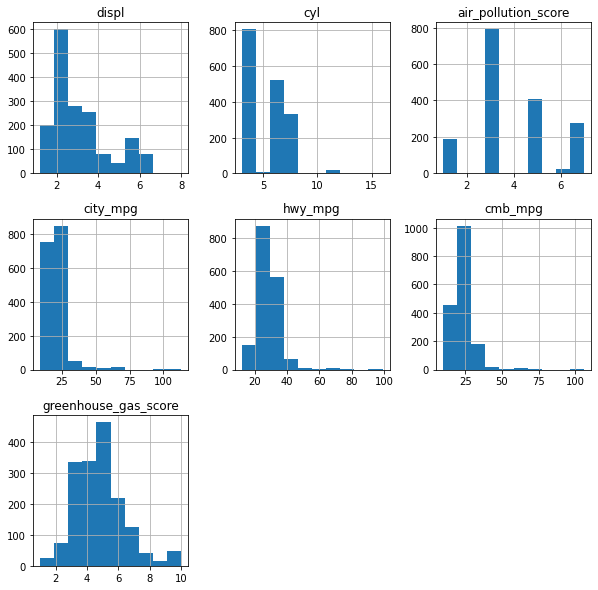

In [141]:
df_18.hist(figsize=(10,10));

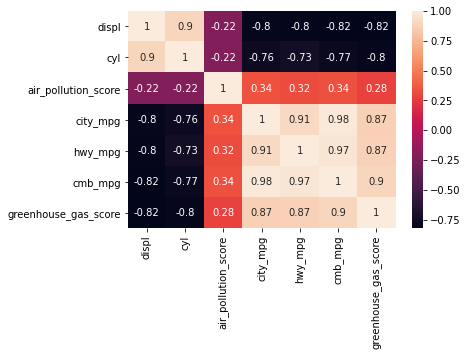

In [142]:
sns.heatmap(df_08.corr(),annot = True)

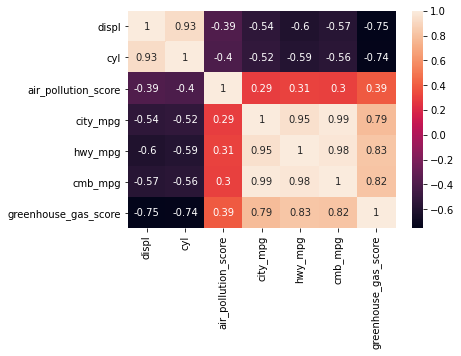

In [143]:
sns.heatmap(df_18.corr(),annot = True)

# Conclusions

## Are more unique models using alternative sources of fuel? By how much?

In [144]:
df_08.fuel.value_counts()

Gasoline    2067
ethanol       66
gas           65
diesel         7
CNG            2
Name: fuel, dtype: int64

In [145]:
df_08.query('fuel != "Gasoline"').model.nunique()

38

In [146]:
df_18.fuel.value_counts()

Gasoline       1516
Gas              55
Ethanol          55
Diesel           38
Electricity      24
Name: fuel, dtype: int64

In [147]:
df_18.query('fuel != "Gasoline"').model.nunique()

39

## How much have vehicle classes improved in fuel economy (increased in mpg)?

In [148]:
df_08.columns

Index(['model', 'displ', 'cyl', 'trans', 'drive', 'fuel', 'cert_region',
       'veh_class', 'air_pollution_score', 'city_mpg', 'hwy_mpg', 'cmb_mpg',
       'greenhouse_gas_score', 'smartway'],
      dtype='object')

In [149]:
df_08.groupby('veh_class')['cmb_mpg'].mean()

veh_class
SUV              17.920807
large car        18.323308
midsize car      21.395604
minivan          18.666667
pickup           16.060837
small car        21.054896
station wagon    22.349593
van              14.206897
Name: cmb_mpg, dtype: float64

In [150]:
df_18.groupby('veh_class')['cmb_mpg'].mean()

veh_class
large car          23.372881
midsize car        27.821429
minivan            20.800000
pickup             18.589744
small SUV          23.968326
small car          25.388889
special purpose    18.666667
standard SUV       18.160920
station wagon      27.485714
Name: cmb_mpg, dtype: float64

In [151]:
increase = df_18.groupby('veh_class')['cmb_mpg'].mean() - df_08.groupby('veh_class')['cmb_mpg'].mean()
increase

veh_class
SUV                     NaN
large car          5.049573
midsize car        6.425824
minivan            2.133333
pickup             2.528907
small SUV               NaN
small car          4.333993
special purpose         NaN
standard SUV            NaN
station wagon      5.136121
van                     NaN
Name: cmb_mpg, dtype: float64

In [152]:
increase.dropna(inplace=True)

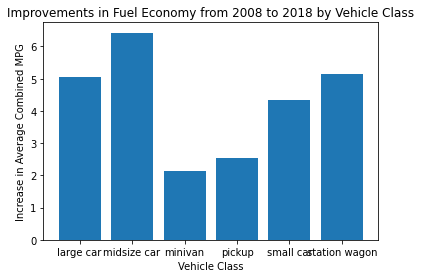

In [153]:
plt.bar(increase.index, increase)
plt.title('Improvements in Fuel Economy from 2008 to 2018 by Vehicle Class')
plt.xlabel('Vehicle Class')
plt.ylabel('Increase in Average Combined MPG');

## What are the characteristics of SmartWay vehicles? Have they changed over time?

In [154]:
df_08.smartway.unique()

array(['no', 'yes'], dtype=object)

In [155]:
df_08.query('smartway == "yes"').mean()

displ                    2.49232
cyl                      4.66400
air_pollution_score      6.99680
city_mpg                21.45760
hwy_mpg                 28.88000
cmb_mpg                 24.20160
greenhouse_gas_score     7.02720
dtype: float64

In [156]:
df_18.smartway.unique()

array(['No', 'Yes', 'Elite'], dtype=object)

In [157]:
df_18.query('smartway in ["yes","Elite"]').mean()

displ                    1.970588
cyl                      4.000000
air_pollution_score      7.000000
city_mpg                53.235294
hwy_mpg                 53.117647
cmb_mpg                 53.000000
greenhouse_gas_score    10.000000
dtype: float64

In [158]:
df_18.query('smartway in ["yes","Elite"]').mean() - df_08.query('smartway == "yes"').mean()

displ                   -0.521732
cyl                     -0.664000
air_pollution_score      0.003200
city_mpg                31.777694
hwy_mpg                 24.237647
cmb_mpg                 28.798400
greenhouse_gas_score     2.972800
dtype: float64

## What features are associated with better fuel economy?

In [159]:
df_08.query('cmb_mpg > cmb_mpg.mean()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000,1048.000000
mean,2.663931,4.887405,6.557252,20.249046,27.547710,22.921756,6.615458
std,0.674432,1.034604,1.102253,3.172229,3.069027,2.919418,0.810644
min,1.300000,4.000000,1.000000,17.000000,20.000000,20.000000,4.000000
25%,2.300000,4.000000,6.000000,18.000000,25.000000,21.000000,6.000000
50%,2.500000,4.000000,6.000000,20.000000,27.000000,22.000000,6.000000
75%,3.000000,6.000000,7.000000,21.000000,29.000000,24.000000,7.000000
max,6.000000,8.000000,9.500000,48.000000,45.000000,46.000000,10.000000


In [160]:
df_18.query('cmb_mpg > cmb_mpg.mean()').describe()

,displ,cyl,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score
count,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000,766.000000
mean,2.059399,4.164491,4.681462,26.595300,34.386423,29.506527,6.142298
std,0.483705,0.671818,1.864101,10.431259,8.657583,9.584401,1.384078
min,1.200000,3.000000,1.000000,20.000000,27.000000,24.000000,4.000000
25%,1.800000,4.000000,3.000000,22.000000,30.000000,25.000000,5.000000
50%,2.000000,4.000000,5.000000,24.000000,32.000000,27.000000,6.000000
75%,2.000000,4.000000,7.000000,27.000000,36.000000,30.000000,7.000000
max,3.600000,6.000000,7.000000,113.000000,99.000000,106.000000,10.000000


## For all of the models that were produced in 2008 that are still being produced now, how much has the mpg improved and which vehicle improved the most?

In [161]:
df_08.rename(columns= lambda x: x[:10]+'_2008',inplace=True)

In [163]:
df_08.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008
0,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,CA,SUV,7.0,15.0,20.0,17.0,4,no
1,ACURA MDX,3.7,6,Auto-S5,4WD,Gasoline,FA,SUV,6.0,15.0,20.0,17.0,4,no


In [164]:
df_combined = df_08.merge(df_18,left_on= 'model_2008',right_on='model')
df_combined.head(2)

,model_2008,displ_2008,cyl_2008,trans_2008,drive_2008,fuel_2008,cert_regio_2008,veh_class_2008,air_pollut_2008,city_mpg_2008,hwy_mpg_2008,cmb_mpg_2008,greenhouse_2008,smartway_2008,model,displ,cyl,trans,drive,fuel,cert_region,veh_class,air_pollution_score,city_mpg,hwy_mpg,cmb_mpg,greenhouse_gas_score,smartway
0,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,FA,small SUV,3.0,20.0,28.0,23.0,5,No
1,ACURA RDX,2.3,4,Auto-S5,4WD,Gasoline,CA,SUV,7.0,17.0,22.0,19.0,5,no,ACURA RDX,3.5,6,SemiAuto-6,2WD,Gasoline,CA,small SUV,3.0,20.0,28.0,23.0,5,No


In [166]:
model_mpg = df_combined.groupby('model')['cmb_mpg_2008','cmb_mpg'].mean()
model_mpg.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,cmb_mpg_2008,cmb_mpg
model,,
ACURA RDX,19.000000,22.500000
AUDI A3,23.333333,28.000000
AUDI A4,21.000000,27.000000
AUDI A6,19.666667,25.666667
AUDI A8 L,16.500000,22.000000


In [167]:
model_mpg['mpg_change'] = model_mpg.cmb_mpg - model_mpg.cmb_mpg_2008
model_mpg.head()

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
ACURA RDX,19.000000,22.500000,3.500000
AUDI A3,23.333333,28.000000,4.666667
AUDI A4,21.000000,27.000000,6.000000
AUDI A6,19.666667,25.666667,6.000000
AUDI A8 L,16.500000,22.000000,5.500000


In [168]:
model_mpg[model_mpg.mpg_change == model_mpg.mpg_change.max()]

,cmb_mpg_2008,cmb_mpg,mpg_change
model,,,
VOLVO XC 90,15.666667,32.2,16.533333
